# Project Report

## Introduction

This project evaluates the relationship between the fines recorded by the municipal speed enforcement and the road accidents that happened in the city of Konstanz.The major objective of this project is to carefully examine and assess if the imposition of penalties by the municipal speed enforcement may have a substantial impact on the number of accidents that occur in Constance. It will be possible to determine from the analysis of the research's data and the conclusions published in a full report if the implementation of penalties can assist reduce the number of accidents or if it has the opposite impact and increases them.

## Data Source 1

Metadata URL: https://mobilithek.info/offers/-2507179451879954949

Data URL: https://offenedaten-konstanz.de/sites/default/files/Blitzerdaten%20Jahresstatistik%202019.csv

Data Type: CSV

These annual statistics allow for the retrieval of fines issued by the city of Konstanz's municipal speed enforcement system throughout the course of a 12 months.

## Data Source 2

Metadata URL: https://mobilithek.info/offers/-197304001474165362
        
Data URL: https://offenedaten-konstanz.de/sites/default/files/Unfallatlas_Konstanz_Gesamt_2016-2019.csv
        
Data Type: CSV
    
Road traffic accidents are accidents in which people are killed or injured or property is damaged as a result of driving on public roads and squares.ccidents involving injuries to people are included in the accident atlas. It does not display accidents that solely cause property damage. Based on reports from the police stations, the accident atlas provides information gathered from statistics of traffic accidents.

In [35]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [20]:
enforcement = pd.read_sql_table('SpeedEnforcement', 'sqlite:///konstanz.db')
accidents = pd.read_sql_table('AccidentData', 'sqlite:///konstanz.db')

In [25]:
enforcement

,index,Location,Month,Measured_vehicle,Violate,Valid_violations,Warnings,Fines,Max_speed,Revenue
0,0,7,1,743.993,1.852,1.554,1.524,30,95.0,30290
1,1,7,2,818.973,1.729,1.362,1.300,62,104.0,34200
2,2,7,3,1.129.972,3.501,2.836,2.767,69,97.0,56660
3,3,7,4,1.147.216,4.359,3.451,3.359,92,108.0,72265
4,4,7,5,1.101.258,3.889,3.197,3.106,91,100.0,65430
...,...,...,...,...,...,...,...,...,...,...
112,112,1,9,259.323,1.705,1.350,1.317,33,99.0,27545
113,113,1,10,270.563,1.673,1.401,1.369,32,103.0,28215
114,114,1,11,226.018,1.123,955.000,923.000,32,94.0,19775
115,115,1,12,0,0.000,0.000,0.000,0,NaN,0


In [17]:
accidents

,index,AccidentId,Year,Month,Weekday,Hour,Category,CollisionType,AccidentType,LightningCondition,IsBicycle,IsPassengerCar,IsFoot,IsMotorcyle,IsLorry,IsOther
0,0,a2af2811f3abcfbc205865c6b86d580c24fe1a02,2016,1,2,13,3,5,3,0.0,0,1,0,0,0.0,0
1,1,9fe6052f828a285a26555a58d7813144bd3ca367,2016,1,6,11,1,8,1,0.0,0,1,0,1,0.0,0
2,2,39a42d55f83a7fdb56035ccb8a8832e187f38849,2016,1,7,17,3,2,2,0.0,0,1,0,0,0.0,0
3,3,f2c109a3e567f4b210b5198bb49be120839f0730,2016,1,3,17,3,6,7,0.0,0,1,1,0,0.0,0
4,4,2780e4e8e7582b2c764d7f875f341619cda0b3d4,2016,1,4,11,3,0,1,0.0,0,0,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1256,a17f92a7ae0bcabfe6708ef4fe0a25c03d965cc6,2019,12,2,11,3,5,3,0.0,1,1,0,0,0.0,0
1257,1257,f12097a9494d650bb16f44fdade13c82a82611ef,2019,12,4,12,3,5,2,0.0,0,1,0,1,0.0,0
1258,1258,b7b02918d3869d0df569d1079b328d81ce4b91be,2019,12,2,14,3,2,7,0.0,0,0,0,1,1.0,0
1259,1259,415f0a4f3c7d15341fdeca875f539fa1e99fe60a,2019,12,6,8,2,0,1,0.0,1,0,0,0,0.0,0


In [21]:
## excluding all years other than 2019, as enforcement data frame is based on that year.
accidents.loc[accidents["Year"] == 2019 ]

,index,AccidentId,Year,Month,Weekday,Hour,Category,CollisionType,AccidentType,LightningCondition,IsBicycle,IsPassengerCar,IsFoot,IsMotorcyle,IsLorry,IsOther
972,972,b55105d65bc6f84c2e31aa5dfc151e4837e0aaa2,2019,1,5,16,3,0,1,0.0,1,0,0,0,0.0,0
973,973,1f7916c2df8e70eb5abf193061087ac60982f5ef,2019,1,6,15,2,2,1,0.0,0,1,0,0,0.0,0
974,974,69dd78c6a2f2f2e0d07e8606d3ad8ec70e81479a,2019,1,5,14,2,3,1,0.0,0,1,0,0,0.0,0
975,975,44d4776dffb692d556540899fd8b6c564bd6200c,2019,1,7,14,3,3,6,0.0,0,1,0,0,0.0,1
976,976,d2eac676d7c641a11f1870d8e3ed915f59f8852f,2019,1,5,8,2,4,6,0.0,1,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1256,a17f92a7ae0bcabfe6708ef4fe0a25c03d965cc6,2019,12,2,11,3,5,3,0.0,1,1,0,0,0.0,0
1257,1257,f12097a9494d650bb16f44fdade13c82a82611ef,2019,12,4,12,3,5,2,0.0,0,1,0,1,0.0,0
1258,1258,b7b02918d3869d0df569d1079b328d81ce4b91be,2019,12,2,14,3,2,7,0.0,0,0,0,1,1.0,0
1259,1259,415f0a4f3c7d15341fdeca875f539fa1e99fe60a,2019,12,6,8,2,0,1,0.0,1,0,0,0,0.0,0


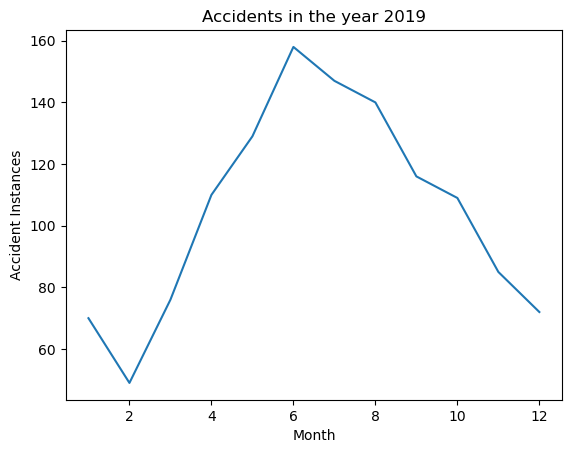

In [56]:
df = accidents.groupby('Month').size()

df.plot()
plt.title("Accidents in the year 2019")
plt.xlabel("Month")
plt.ylabel("Accident Instances")
plt.show()